# Activity 16 - Multi-layer Perceptron

***
##### CS 434 - Data Mining and Machine Learning
##### Oregon State University-Cascades
***

## <img src="https://img.icons8.com/color/32/000000/fork-lift.png"/> Loading packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Dataset

[Wall-Following Robot Navigation Data ](https://archive.ics.uci.edu/ml/datasets/Wall-Following+Robot+Navigation+Data)

This robot wall-following task was designed to test the hypothesis that this apparently simple navigation task is indeed a non-linearly separable classification task. Thus, linear classifiers, such as the Perceptron network, are not able to learn the task and command the robot around the room without collisions. Nonlinear neural classifiers, such as the MLP network, are able to learn the task and command the robot successfully without collisions.

### Attributes

* **US1**: ultrasound sensor at the front of the robot (angle: 180°)
* **US2**: ultrasound reading (angle: -165°)
* **US3**: ultrasound reading (angle: -150°)
* **US4**: ultrasound reading (angle: -135°)
* **US5**: ultrasound reading (angle: -120°)
* **US6**: ultrasound reading (angle: -105°)
* **US7**: ultrasound reading (angle: -90°)
* **US8**: ultrasound reading (angle: -75°)
* **US9**: ultrasound reading (angle: -60°)
* **US10**: ultrasound reading (angle: -45°)
* **US11**: ultrasound reading (angle: -30°)
* **US12**: ultrasound reading (angle: -15°)
* **US13**: reading of ultrasound sensor situated at the back of the robot (angle: 0°)
* **US14**: ultrasound reading (angle: 15°)
* **US15**: ultrasound reading (angle: 30°)
* **US16**: ultrasound reading (angle: 45°)
* **US17**: ultrasound reading (angle: 60°)
* **US18**: ultrasound reading (angle: 75°)
* **US19**: ultrasound reading (angle: 90°)
* **US20**: ultrasound reading (angle: 105°)
* **US21**: ultrasound reading (angle: 120°)
* **US22**: ultrasound reading (angle: 135°)
* **US23**: ultrasound reading (angle: 150°)
* **US24**: ultrasound reading (angle: 165°)

### Class Label
  * Move-Forward
  * Slight-Right-Turn
  * Sharp-Right-Turn
  * Slight-Left-Turn

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00194/sensor_readings_24.data'
header = ['US1','US2','US3','US4','US5','US6','US7','US8','US9','US10','US11','US12','US13','US14','US15','US16','US17','US18','US19','US20','US21','US22','US23','US24','Class']

*** 
# Exercise #1 - Load data
*** 

##### 1.1 Read the url into new dataframe `df`.

In [5]:
# read the url into df
df = pd.read_csv(url, header=None)
df.columns = header
df

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,US11,US12,US13,US14,US15,US16,US17,US18,US19,US20,US21,US22,US23,US24,Class
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,1.698,1.687,1.698,1.717,1.744,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,1.695,1.687,1.695,1.720,1.744,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,1.696,1.687,1.695,1.717,1.744,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,1.730,1.687,1.695,1.717,1.744,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,1.696,1.687,1.695,1.717,1.744,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,1.024,1.057,1.285,1.285,5.000,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,1.005,1.044,1.269,1.266,0.894,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,0.987,1.001,1.078,1.246,0.873,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,0.967,0.979,1.055,1.227,5.000,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


##### 1.2 Describe your data

In [7]:
# describe the dataset
df.describe()

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,US11,US12,US13,US14,US15,US16,US17,US18,US19,US20,US21,US22,US23,US24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,2.549398,2.077776,2.125777,2.190486,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,1.382029,1.249301,1.407168,1.576873,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,0.783000,0.778000,0.770000,0.756000,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,1.579000,1.293000,1.190750,1.031000,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,1.999500,1.689000,1.609000,1.493000,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,3.216250,2.281500,2.357750,2.739250,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,5.019000,5.000000,5.003000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


##### 1.3 Count values of `Class` label

In [8]:
# 'Class' value counts
df['Class'].value_counts()

Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     826
Slight-Left-Turn      328
Name: Class, dtype: int64

*** 
# Exercise #2 - Prepare dataset
*** 

##### 2.1 Split `X` and `y`

In [9]:
# split X and y
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(5456, 24) (5456,)


##### 2.2 Partition to train and test sets with hold-out

* test proportion of 20%
* `random_state=1`
* stratify by `y`

In [0]:
# split train and test
X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.2, 
                             random_state=1,
                             stratify=y)

##### 2.3 Print the shapes of your four sets

In [12]:
# print shapes of train and test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4364, 24) (1092, 24) (4364,) (1092,)


###### Self Check

In [0]:
assert X_train.shape[0] == 4364 and X_train.shape[1] == 24

In [0]:
assert X_test.shape[0] == 1092 and X_test.shape[1] == 24

##### 2.4 Function to train and test

Build a function to `train_and_test`:
* takes a classifier, `X_train`, `y_train`, `X_test`, `y_test`
* returns `y_preds` and a `score`

Use the classifier's default `score(.)` function

In [0]:
# train_and_test
def train_and_test(clf, X_train, y_train, X_test, y_test):
  clf.fit(X, y)
  y_preds = clf.predict(X)
  score = clf.score(X, y)
  return y_preds, score

##### 2.5 Function to plot confusion matrix `graph_confmat`

In [0]:
# graph a confusion matrix
def graph_confmat(y_true, y_pred):
  confmat = confusion_matrix(y_true=y, y_pred=y_preds)
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  plt.show()

*** 
# Exercise #3 - Perceptron
***

##### 3.1 Build Perceptron ([see api](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html))

* stopping criteria of `1e-03`
* regularization of `'l1'`
* `random_state=1`
* `shuffle=True`

In [0]:
# build Perceptron
ppn = Perceptron(shuffle=True, random_state=1, penalty='l1', tol=1e-03)

##### 3.2 Train and test the Perceptron

In [0]:
# train and test Perceptron
y_preds, score = train_and_test(ppn, X_train, y_train, X_test, y_test)

##### 3.3 Print the score

In [23]:
# print score
print(score)

0.5181451612903226


##### 3.4 Graph the confusion matrix

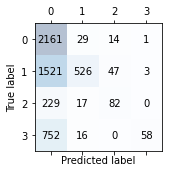

In [24]:
# confusion matrix
graph_confmat(y, y_preds)

##### 3.5 Print a classification report (see [api](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification%20report))

In [27]:
# print classification report
print(classification_report(y, y_preds))

                   precision    recall  f1-score   support

     Move-Forward       0.46      0.98      0.63      2205
 Sharp-Right-Turn       0.89      0.25      0.39      2097
 Slight-Left-Turn       0.57      0.25      0.35       328
Slight-Right-Turn       0.94      0.07      0.13       826

         accuracy                           0.52      5456
        macro avg       0.72      0.39      0.37      5456
     weighted avg       0.71      0.52      0.45      5456



*** 
# Exercise #4 - Multi-layer Perceptron
***

##### 4.1 Build Multi-layer Perceptron ([see api](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html))

* max iterations of `500`
* `random_state=1`

In [0]:
# build MLP
nn = MLPClassifier(max_iter=500, random_state=1)

##### 4.2 Train and test your MLP

In [0]:
# train and test MLP
y_preds, score = train_and_test(nn, X_train, y_train, X_test, y_test)

##### 4.3 Print the score

In [34]:
# print score
print(score)

0.9858870967741935


##### 4.4 Graph the confusion matrix

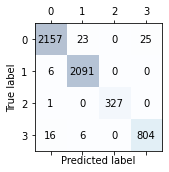

In [35]:
# graph confusion matrix
graph_confmat(y, y_preds)

##### 4.5 Print a classification report (see [api](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification%20report))

In [36]:
# print classification report
print(classification_report(y, y_preds))

                   precision    recall  f1-score   support

     Move-Forward       0.99      0.98      0.98      2205
 Sharp-Right-Turn       0.99      1.00      0.99      2097
 Slight-Left-Turn       1.00      1.00      1.00       328
Slight-Right-Turn       0.97      0.97      0.97       826

         accuracy                           0.99      5456
        macro avg       0.99      0.99      0.99      5456
     weighted avg       0.99      0.99      0.99      5456



*** 
# Exercise #5 - Analyze results
***

##### 5.1 Print the number of layers in your MLP

In [38]:
# number of layers
print(nn.n_layers_)

3


##### 5.2 Print the number of outputs of your MLP

In [39]:
# number of outputs
print(nn.n_outputs_)

4


##### 5.3 Print number of iterations

In [40]:
# print number of iterations
print(nn.n_iter_)

428


##### 5.4 Plot loss over time

* epochs along `x-axis`
* loss (`loss_curve_`) along `y-axis`

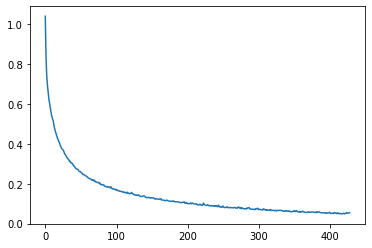

In [44]:
# loss vs epochs
plt.plot(range(nn.n_iter_), nn.loss_curve_)

##### 5.5 Print `intercepts_`

In [41]:
# print intercepts
print(nn.intercepts_)

[array([-0.25258503, -0.19799414, -0.5909988 , -0.25008716, -0.28618336,
       -0.48536565,  0.25577493,  0.31355248,  0.31200785, -0.54858421,
        0.10738299,  0.83771115,  0.01412263,  0.24026844, -0.20084893,
       -0.5334782 , -0.20400165, -0.49087904,  0.4817551 , -0.08089322,
       -0.31173742,  0.09254664, -0.12749838, -0.42958459,  0.01052167,
        0.57702036,  0.15652172, -0.15200048, -0.09852456, -0.65335528,
        0.40372676, -0.25826631, -0.12867787,  0.01646744, -0.30977566,
        0.17105077,  0.51200797,  0.12866139,  0.46864774,  0.06516601,
        0.36517759, -0.62155357, -0.18106155,  0.3700447 , -0.02017046,
       -0.25287789, -0.1903268 , -0.26052816,  0.57708158,  0.17954312,
        0.0396733 , -0.15409662,  0.29322823,  0.63634787, -0.31388408,
        0.4689168 ,  0.55758615, -0.05984443,  0.38971924,  0.46802845,
        0.13213793, -0.42953903,  0.41547595, -0.50788502,  0.41298983,
       -0.13729587,  0.34047961,  0.14106587,  0.52999841,  0.7

<img src="https://66.media.tumblr.com/dded9d1a2bf2068f92af9f7a9b6b5451/tumblr_p6s3hbPzgV1vd8jsjo1_500.gifv" width="300">